# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [45]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [47]:
apple = data

### Step 4.  Check out the type of the columns

In [48]:
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


### Step 5. Transform the Date column as a datetime type

In [49]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [50]:
apple.set_index('Date', inplace = True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [51]:
apple.index.duplicated().any()

np.False_

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [52]:
apple = apple.sort_index()

### Step 9. Get the last business day of each month

In [53]:
apple.resample('BM').last()

/tmp/ipython-input-1185423699.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple.resample('BM').last()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10.  What is the difference in days between the first day and the oldest

In [54]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [55]:
apple.resample('M').size().shape[0]

/tmp/ipython-input-1032605167.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple.resample('M').size().shape[0]


404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

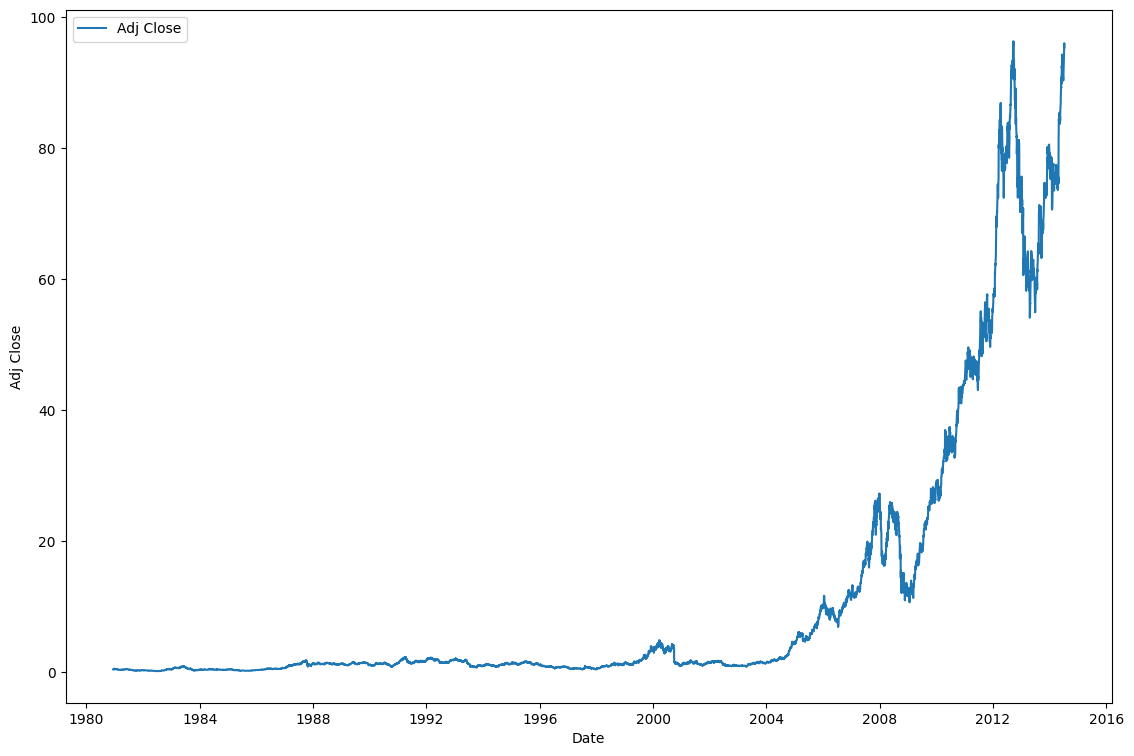

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize = (13.5, 9))
plt.plot(apple['Adj Close'], label = 'Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()